<a href="https://colab.research.google.com/github/Ganesh-2250/Reactorious---NMR-for-Molecular-Substructure-Prediction/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn rdkit matplotlib pandas kagglehub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 43.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub

from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from rdkit.Chem import AllChem

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
path = kagglehub.dataset_download("yanmaksi/big-molecules-smiles-dataset")
files = os.listdir(path)
full_path = os.path.join(path, files[0])
print(path)
print(files)
print(full_path)


Using Colab cache for faster access to the 'big-molecules-smiles-dataset' dataset.
/kaggle/input/big-molecules-smiles-dataset
['SMILES_Big_Data_Set.csv']
/kaggle/input/big-molecules-smiles-dataset/SMILES_Big_Data_Set.csv


In [ ]:
df = pd.read_csv(full_path)
display(df.head())
print(df.shape)
display(df.isnull().sum())
display(df.dtypes)


,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.2130


(16087, 5)


,0
SMILES,0
pIC50,1050
mol,0
num_atoms,0
logP,0


,0
SMILES,object
pIC50,float64
mol,object
num_atoms,int64
logP,float64


In [ ]:
if 'SMILES' in df.columns:
    SMILES_COL = 'SMILES'
elif 'smiles' in df.columns:
    SMILES_COL = 'smiles'
else:
    SMILES_COL = df.columns[0]

if 'pIC50' in df.columns:
    PIC50_COL = 'pIC50'
else:
    PIC50_COL = None


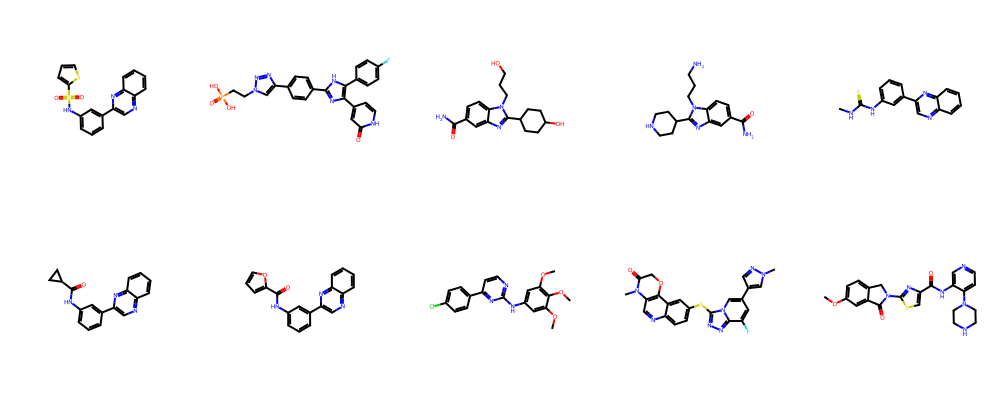

In [ ]:
sample_df = df.head(10)
mols = [Chem.MolFromSmiles(s) for s in sample_df[SMILES_COL]]
mols = [m for m in mols if m is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))
display(img)


In [ ]:
valid_mols = []
for s in df[SMILES_COL]:
    m = Chem.MolFromSmiles(s)
    if m is not None:
        valid_mols.append(m)
    if len(valid_mols) == 2:
        break

mol1, mol2 = valid_mols

for bond in mol1.GetBonds():
    print(bond.GetBeginAtom().GetSymbol(), "-", bond.GetEndAtom().GetSymbol(), bond.GetBondType())

print(mol1.GetNumAtoms())
print(mol2.GetNumAtoms())

fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)

print(fp1.GetNumBits())

tanimoto = DataStructs.TanimotoSimilarity(fp1, fp2)
print(tanimoto)


O - S DOUBLE
S - O DOUBLE
S - N SINGLE
N - C SINGLE
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - C SINGLE
C - C AROMATIC
C - N AROMATIC
N - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - N AROMATIC
C - C AROMATIC
S - C SINGLE
C - C AROMATIC
C - C AROMATIC
C - C AROMATIC
C - S AROMATIC
C - C AROMATIC
S - C AROMATIC
N - C AROMATIC
C - C AROMATIC
25
36
2048
0.10869565217391304


[18:14:16] DEPRECATION WARNING: please use MorganGenerator
[18:14:16] DEPRECATION WARNING: please use MorganGenerator


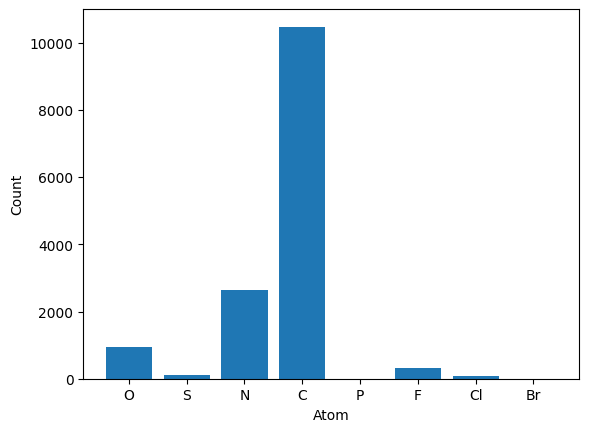

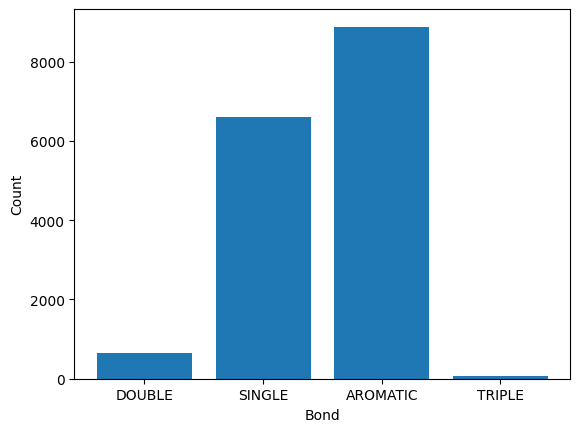

In [ ]:
from collections import Counter

bond_counter = Counter()
atom_counter = Counter()

for smiles in df[SMILES_COL].head(500):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        continue
    for atom in mol.GetAtoms():
        atom_counter[atom.GetSymbol()] += 1
    for bond in mol.GetBonds():
        bond_counter[str(bond.GetBondType())] += 1

plt.figure()
plt.bar(atom_counter.keys(), atom_counter.values())
plt.xlabel("Atom")
plt.ylabel("Count")
plt.show()

plt.figure()
plt.bar(bond_counter.keys(), bond_counter.values())
plt.xlabel("Bond")
plt.ylabel("Count")
plt.show()


In [ ]:
num_atoms_list = []
logP_list = []
molwt_list = []

for smiles in df[SMILES_COL]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        num_atoms_list.append(None)
        logP_list.append(None)
        molwt_list.append(None)
    else:
        num_atoms_list.append(mol.GetNumAtoms())
        logP_list.append(Descriptors.MolLogP(mol))
        molwt_list.append(Descriptors.MolWt(mol))

df['num_atoms'] = num_atoms_list
df['logP'] = logP_list
df['mol_weight'] = molwt_list

cols = ['num_atoms', 'logP', 'mol_weight']
if PIC50_COL is not None:
    cols.append(PIC50_COL)

plot_df = df.dropna(subset=cols)


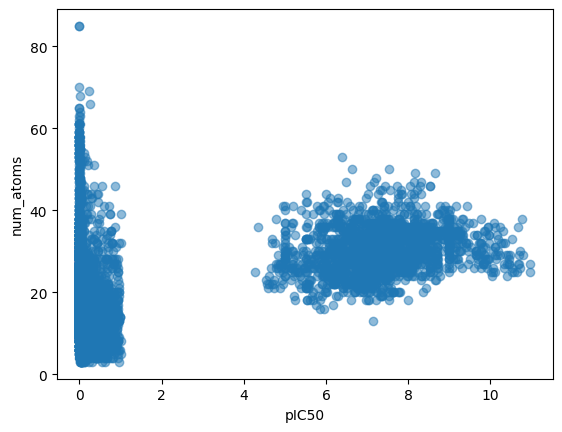

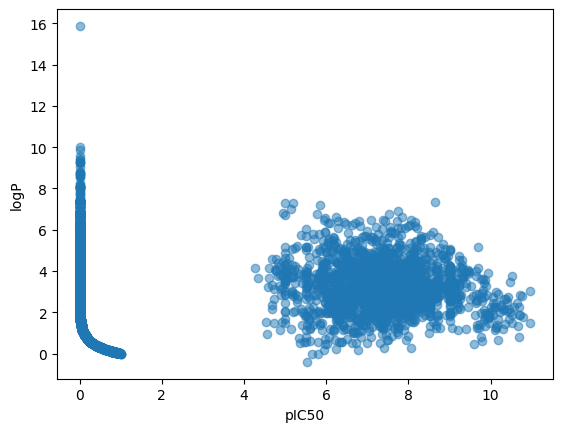

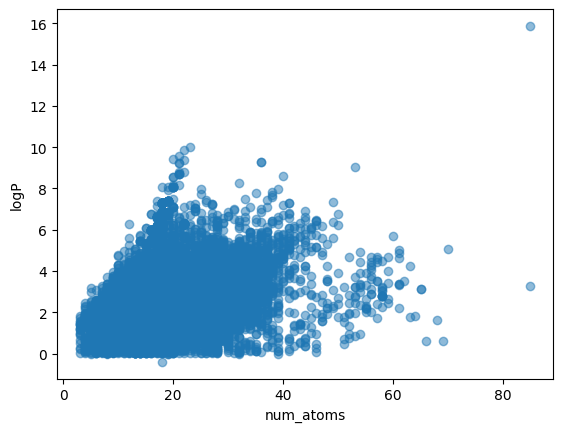

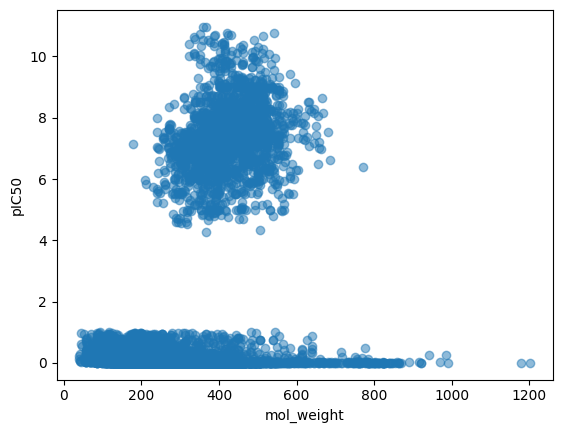

In [ ]:
def scatter_2d(x, y):
    plt.figure()
    plt.scatter(plot_df[x], plot_df[y], alpha=0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

if PIC50_COL is not None:
    scatter_2d(PIC50_COL, 'num_atoms')
    scatter_2d(PIC50_COL, 'logP')
    scatter_2d('num_atoms', 'logP')
    scatter_2d('mol_weight', PIC50_COL)


In [ ]:
feature_cols = ['num_atoms', 'logP', 'mol_weight']
if PIC50_COL is not None:
    feature_cols.append(PIC50_COL)

numeric_df = df[feature_cols].dropna()


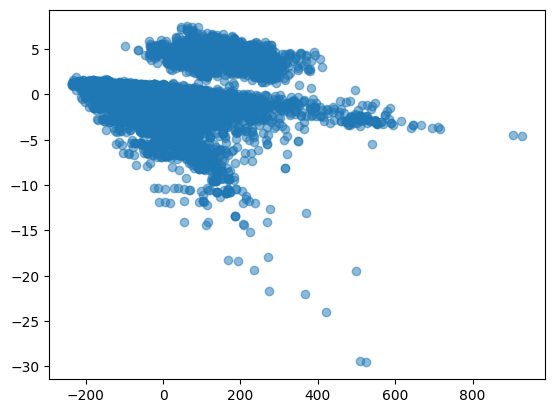

[9.99199823e-01 4.26495456e-04]


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_df)

numeric_df['PCA1'] = pca_result[:, 0]
numeric_df['PCA2'] = pca_result[:, 1]

plt.figure()
plt.scatter(numeric_df['PCA1'], numeric_df['PCA2'], alpha=0.5)
plt.show()

print(pca.explained_variance_ratio_)


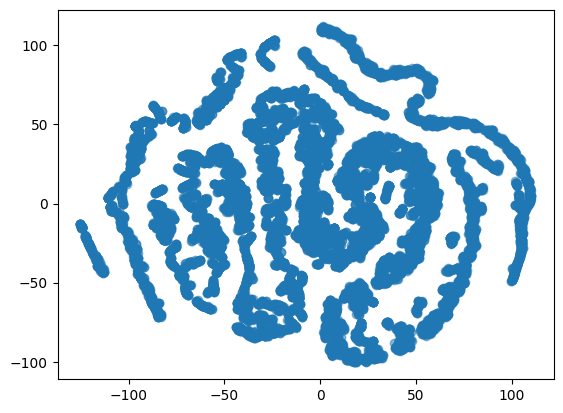

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(numeric_df[feature_cols])

numeric_df['TSNE1'] = tsne_result[:, 0]
numeric_df['TSNE2'] = tsne_result[:, 1]

plt.figure()
plt.scatter(numeric_df['TSNE1'], numeric_df['TSNE2'], alpha=0.5)
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    "Aspect": [
        "Method Type",
        "Preserves Global Structure",
        "Preserves Local Structure",
        "Deterministic",
        "Computational Cost",
        "Use Case"
    ],
    "PCA": [
        "Linear",
        "Yes",
        "Partial",
        "Yes",
        "Low",
        "Variance compression"
    ],
    "t-SNE": [
        "Non-linear",
        "No",
        "Yes",
        "No",
        "High",
        "Cluster visualization"
    ]
})

display(comparison_df)


,Aspect,PCA,t-SNE
0,Method Type,Linear,Non-linear
1,Preserves Global Structure,Yes,No
2,Preserves Local Structure,Partial,Yes
3,Deterministic,Yes,No
4,Computational Cost,Low,High
5,Use Case,Variance compression,Cluster visualization
